In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from geopy.geocoders import Nominatim

df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding='latin-1')
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [117]:
df.shape

(4998, 17)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4222 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [119]:
df.isnull().sum()

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     776
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [120]:
# Convert data types if needed (e.g., convert 'Date' column to datetime)
df['Date'] = pd.to_datetime(df['Date'])


In [121]:
df['Aboard'].fillna(df['Aboard'].median(), inplace=True)
df['Operator'].fillna('Unknown', inplace=True)


In [122]:
df['Operator'] = df['Operator'].str.strip().str.title()


In [123]:
#  identify and handle outliers
max_fatalities = df['Fatalities'].quantile(0.99)
df['Fatalities'] = df['Fatalities'].clip(upper=max_fatalities)

In [124]:
# Check for data integrity issues, for example, by verifying Aboard = Aboard Passengers + Aboard Crew
df['Aboard_Check'] = df['Aboard Passangers'] + df['Aboard Crew']
integrity_check = df[df['Aboard'] != df['Aboard_Check']]

In [125]:
# Resolve data integrity issues
# For example, update 'Aboard' column with the sum of passengers and crew
df['Aboard'] = df['Aboard Passangers'] + df['Aboard Crew']

In [126]:
df['Location'] = df['Location'].str.title()
df['Route']= df['Route'].str.title()
df['AC Type'] = df['AC Type'].str.title()
df['Registration']= df['Registration'].str.title()

In [127]:
# Check for and remove duplicate records
df_duplicates = df[df.duplicated()]
df = df.drop_duplicates()

In [128]:
#Delete all Nan Flights
df = df[pd.notnull(df['Flight #'])]
#Delete all NaN Route
df = df[pd.notnull(df['Route'])]

In [129]:
df.isnull().sum()

Date                      0
Time                     44
Location                  0
Operator                  0
Flight #                  0
Route                     0
AC Type                   0
Registration              8
cn/ln                    14
Aboard                    5
Aboard Passangers         4
Aboard Crew               5
Fatalities                0
Fatalities Passangers     7
Fatalities Crew           8
Ground                    1
Summary                   0
Aboard_Check              5
dtype: int64

In [130]:
#split year and month from date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
#Place these columns next to date
column_order = ['Date', 'Year', 'Month'] + [col for col in df.columns if col not in ['Date', 'Year', 'Month']]
df = df[column_order]
df['Fatality_Ratio (%)'] = (df['Fatalities'] / df['Aboard'])*100
df.head()

,Date,Year,Month,Time,Location,Operator,Flight #,Route,AC Type,Registration,...,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Aboard_Check,Fatality_Ratio (%)
141,1928-01-16,1928,1,NaN,"Solis, Uruguay",Aeropostale,F-AIKG,Buenos Aires - Montevideo,Latecoere 25,F-Aikg,...,2.0,0.0,2.0,2.0,0.0,2.0,0.0,The wing on the mail plane detached from the a...,2.0,100.000000
217,1930-01-19,1930,1,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-At-C Tri Motor,Nc9689,...,16.0,14.0,2.0,16.0,14.0,2.0,0.0,"While en route to Los Angeles, the pilot, flyi...",16.0,100.000000
247,1931-03-31,1931,3,10:45,"Bazaar, Kansas",Trans Continental And Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,Nc-999,...,8.0,6.0,2.0,8.0,6.0,2.0,0.0,"Shortly after taking off from Kansas City, one...",8.0,100.000000
348,1934-08-31,1934,8,22:45,"Amazonia, Missouri",Rapid Air Transport,6,Kansas City - Saint Joseph - Omaha,Stinson Sm-6000B,Nc11118,...,5.0,4.0,1.0,5.0,4.0,1.0,0.0,The plane crashed about 11 miles from St. Jose...,5.0,100.000000
370,1935-05-06,1935,5,3:30,"Atlanta, Missouri",Trans Continental And Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas Dc-2-112,Nc13785,...,14.0,12.0,2.0,5.0,3.0,2.0,0.0,The plane crashed while en route from Albuquer...,14.0,35.714286


In [131]:
# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to geocode location name to coordinates
def geocode_location(location):
    try:
        loc = geolocator.geocode(location)
        return pd.Series([loc.latitude, loc.longitude])
    except:
        return pd.Series([None, None])

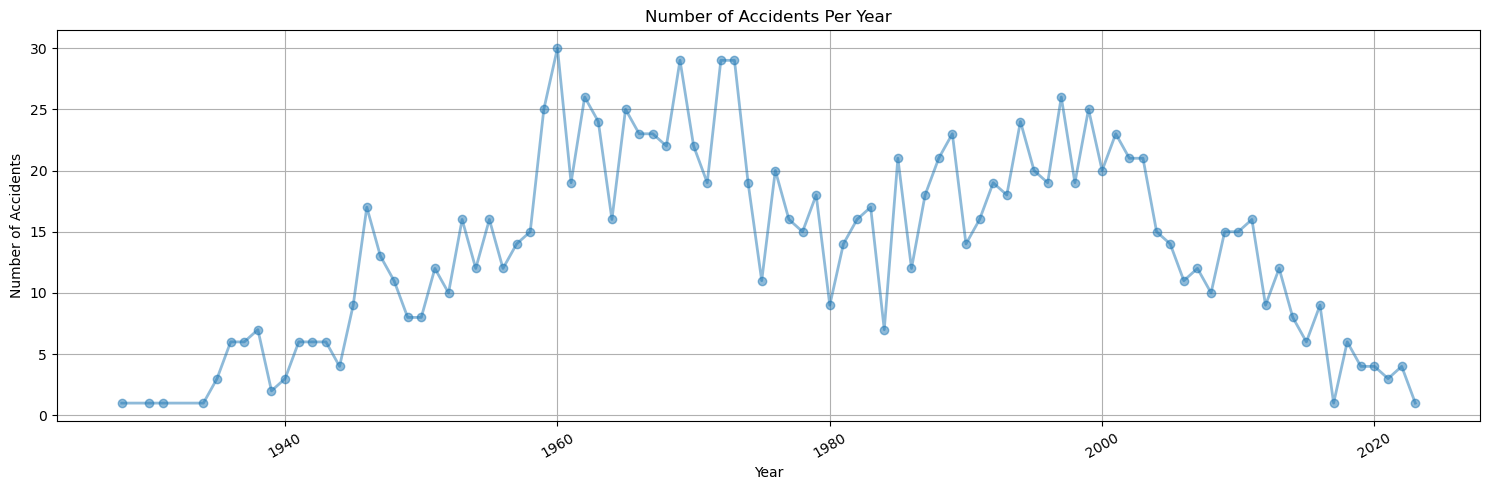

In [132]:
# Number of crushes per year
plt.figure(figsize=(15, 5))
#Group data by year
accidents_per_year = df.groupby('Year').size()
accidents_per_year.plot(kind='line', marker='o', alpha=0.5, linewidth=2)
plt.title('Number of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

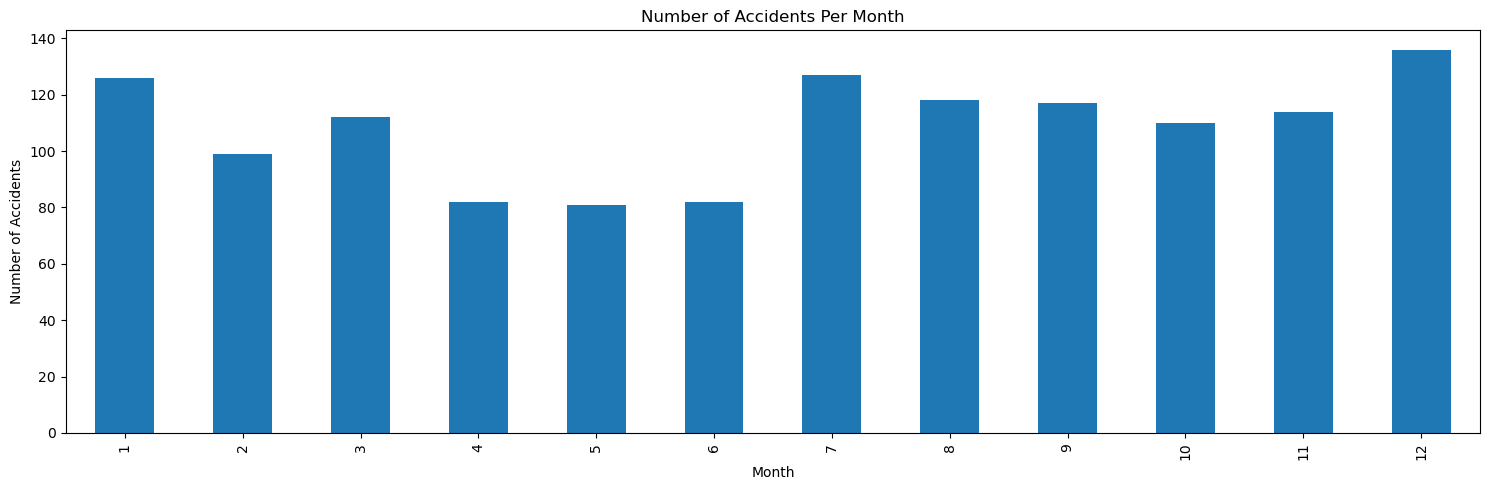

In [133]:
# Plotting the number of accidents for each month
plt.figure(figsize=(15, 5))
#Group data by month
accidents_per_month = df.groupby('Month').size()
accidents_per_month.plot(kind='bar')
plt.title('Number of Accidents Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

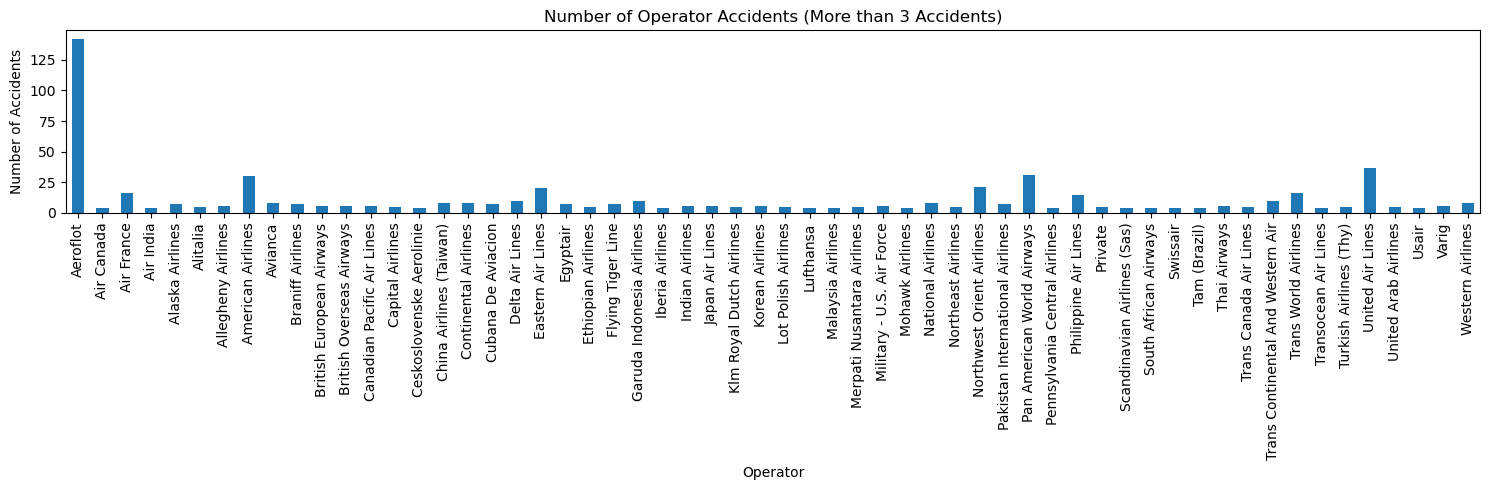

In [134]:
#Histograms of operator crashes (more than 3)
# Count the number of accidents for each operator
accidents_per_operator = df.groupby('Operator').size()

# Filter operators with more than 3 crashes
accidents_per_operator = accidents_per_operator[accidents_per_operator > 3]

# Plotting the histogram for operators with more than 3 crashes
plt.figure(figsize=(15, 5))
accidents_per_operator.plot(kind='bar')
plt.title('Number of Operator Accidents (More than 3 Accidents)')
plt.xlabel('Operator')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

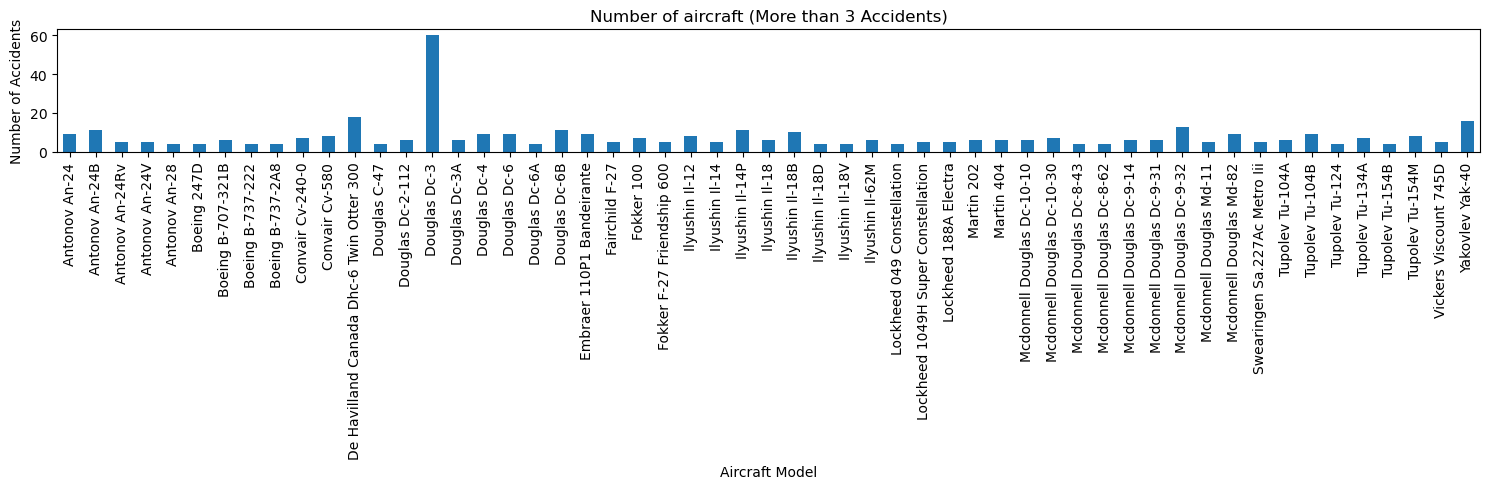

In [135]:
#Historgram of aircraft model crashes (more than 3)
# Count the number of accidents for each aircraft model
accidents_per_model = df.groupby('AC Type').size()

# Filter out models with 3 or fewer crashes
accidents_per_model = accidents_per_model[accidents_per_model > 3]

# Plotting the histogram for operators with more than 3 crashes
plt.figure(figsize=(15, 5))
accidents_per_model.plot(kind='bar')
plt.title('Number of aircraft (More than 3 Accidents)')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

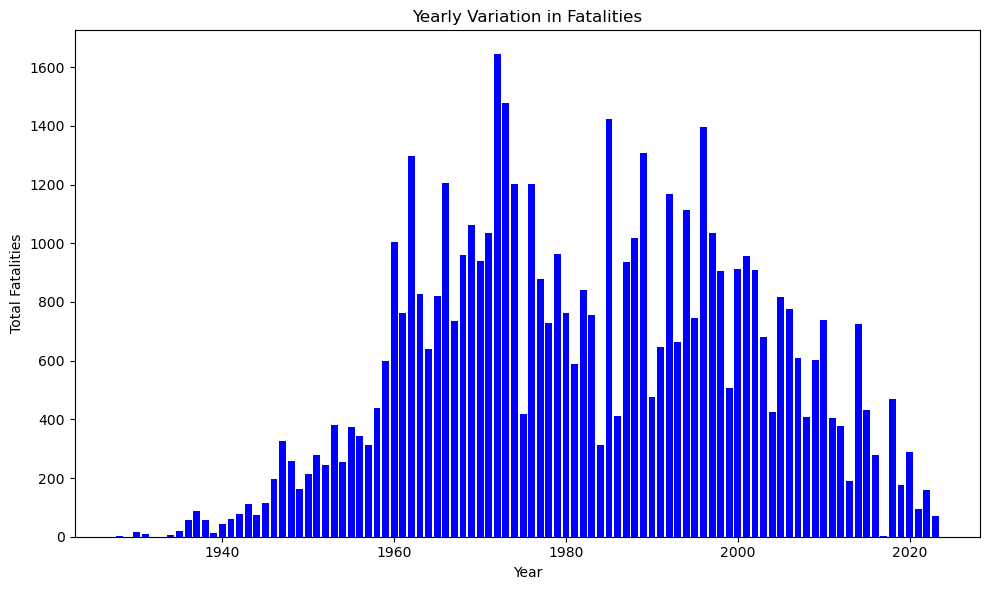

In [140]:


# Grouping data by year and summing up the fatalities
yearly_fatalities = df.groupby('Year')['Fatalities'].sum()

# Plotting the yearly variation in fatalities
plt.figure(figsize=(10, 6))
plt.bar(yearly_fatalities.index, yearly_fatalities.values, color='blue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.title('Yearly Variation in Fatalities')

# Displaying the plot
plt.tight_layout()
plt.show()


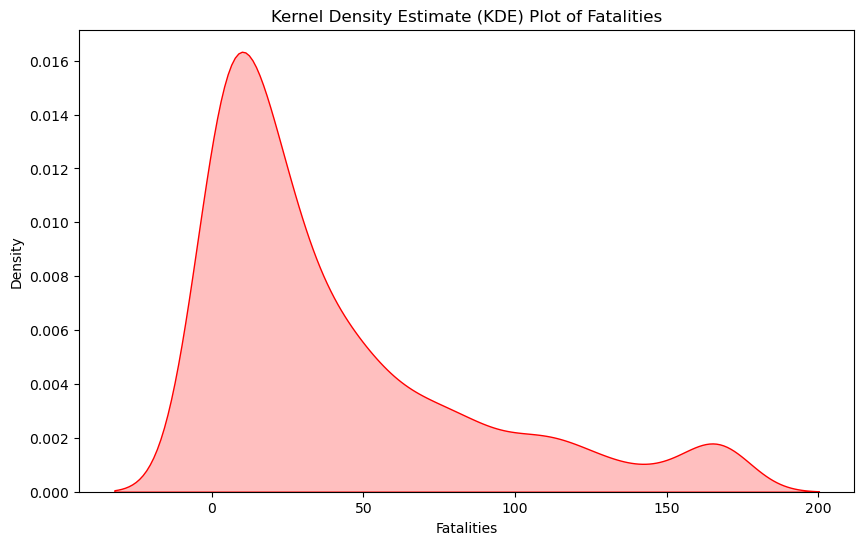

In [ ]:
#KDE plot of fatalities
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fatalities'], fill=True, color='red')
plt.title('Kernel Density Estimate (KDE) Plot of Fatalities')
plt.xlabel('Fatalities')
plt.show()

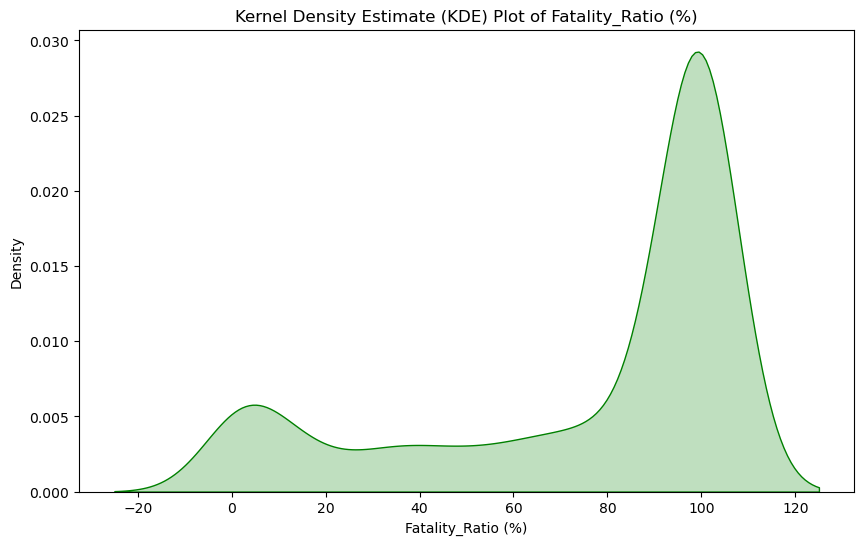

In [ ]:
#KDE plot of fatality ratio
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fatality_Ratio (%)'], fill=True, color='green')
plt.title('Kernel Density Estimate (KDE) Plot of Fatality_Ratio (%)')
plt.xlabel('Fatality_Ratio (%)')
plt.show()

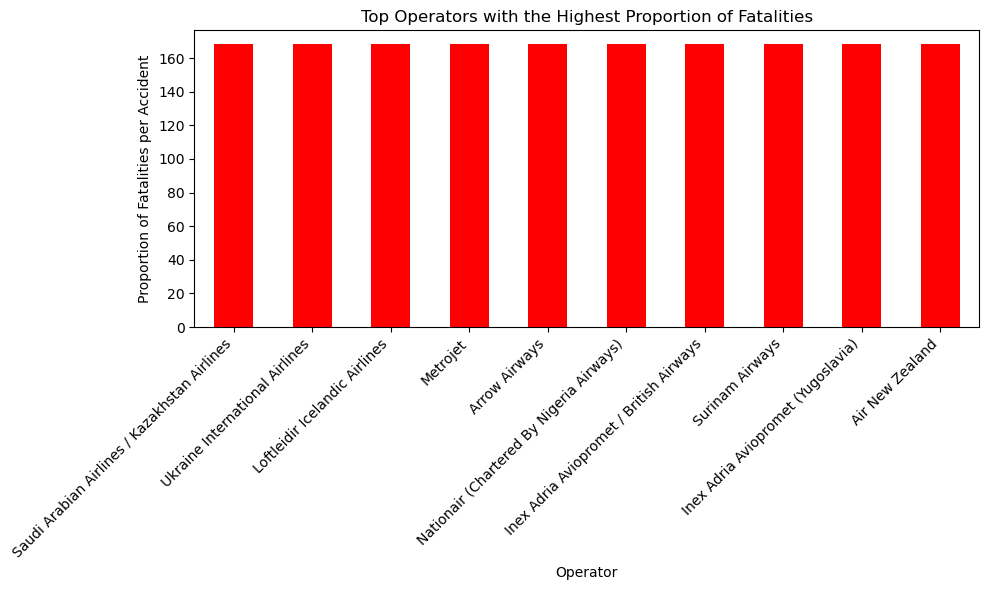

In [139]:


# Plotting the top operators with the highest proportion of fatalities
plt.figure(figsize=(10, 6))
top_operators_fatalities.plot(kind='bar', color='red')

# Adding labels and title
plt.xlabel('Operator')
plt.ylabel('Proportion of Fatalities per Accident')
plt.title('Top Operators with the Highest Proportion of Fatalities')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()


KeyError: 0

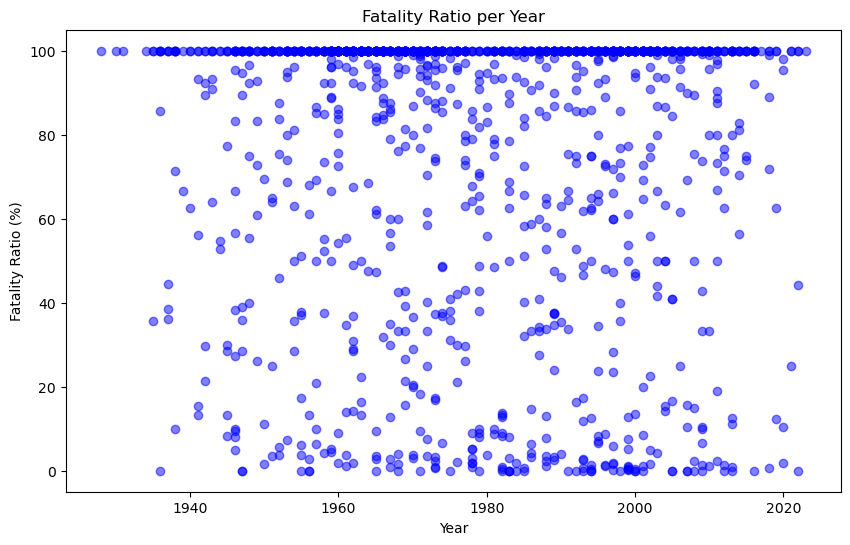

In [142]:


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Fatality_Ratio (%)'], c='blue', alpha=0.5)

# Add labels and title
plt.title('Fatality Ratio per Year')
plt.xlabel('Year')
plt.ylabel('Fatality Ratio (%)')

# Add hover functionality
for i in range(len(df)):
    plt.text(df['Year'][i], df['Fatality_Ratio (%)'][i], 
             f"Aboard: {df['Aboard'][i]}\nFatalities: {df['Fatalities'][i]}\nFlight #: {df['Flight #'][i]}\nLocation: {df['Location'][i]}",
             fontsize=8, ha='left', va='bottom', color='black', alpha=0.8)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


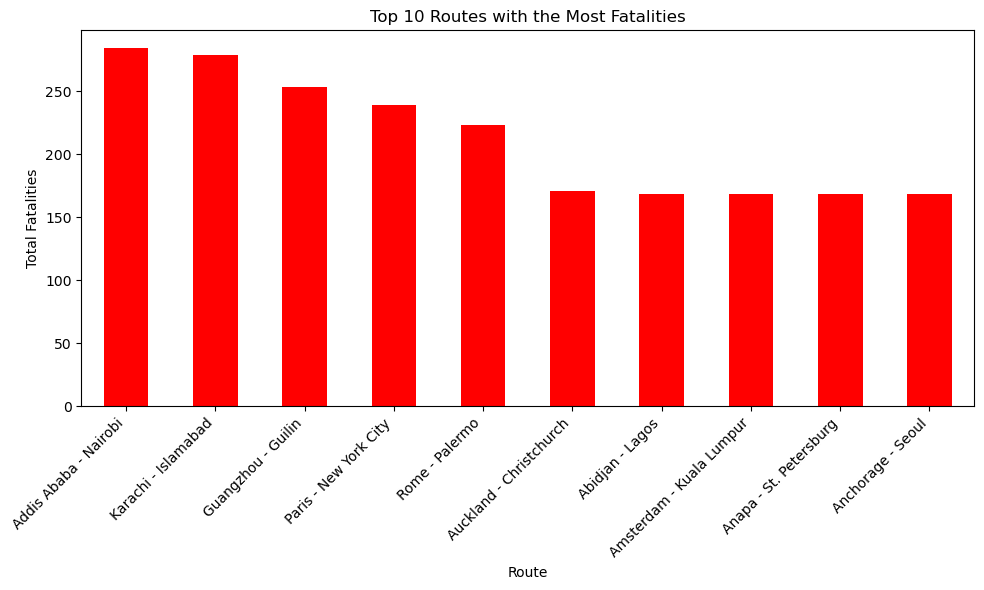

In [143]:

# Group the data by route and sum up the fatalities
fatalities_by_route = df.groupby('Route')['Fatalities'].sum()

# Sort the routes by the total fatalities in descending order and select the top 10
top_routes_fatalities = fatalities_by_route.nlargest(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_routes_fatalities.plot(kind='bar', color='red')

# Add labels and title
plt.xlabel('Route')
plt.ylabel('Total Fatalities')
plt.title('Top 10 Routes with the Most Fatalities')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


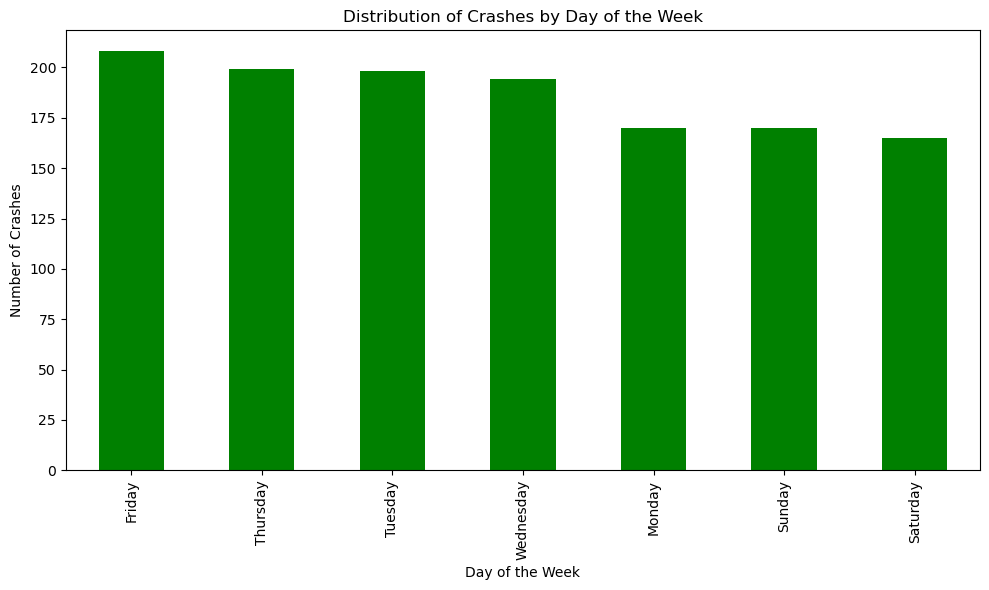

In [145]:
import matplotlib.pyplot as plt

# Assuming your dataset has a 'Date' column
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week from the date
df['Day_of_Week'] = df['Date'].dt.day_name()

# Count the number of crashes by day of the week
crashes_by_day = df['Day_of_Week'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
crashes_by_day.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.title('Distribution of Crashes by Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()


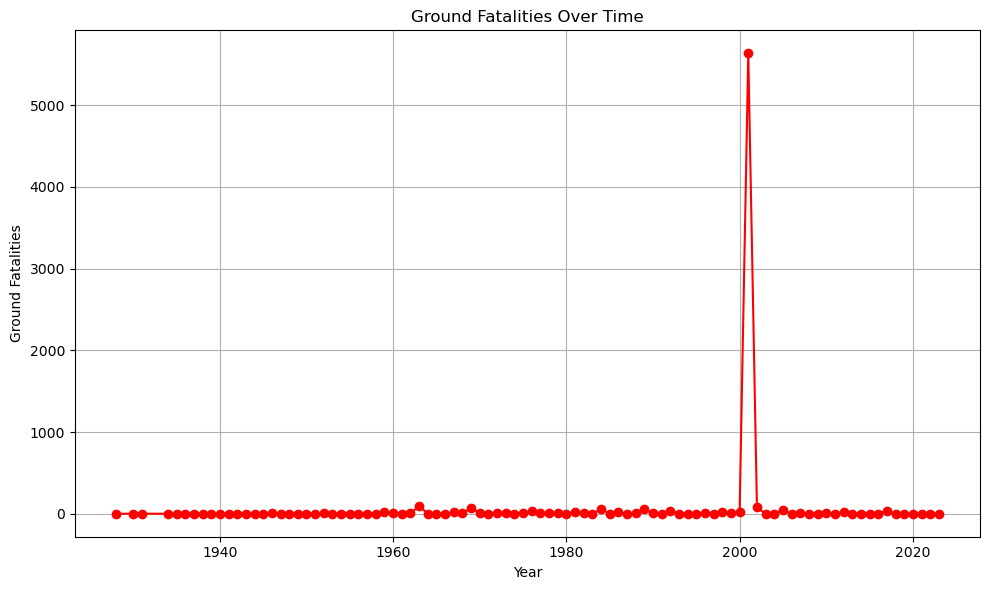

In [146]:
import matplotlib.pyplot as plt

# Assuming your dataset has 'Year' and 'Ground' columns
# Group the data by year and calculate the sum of ground fatalities for each year
ground_fatalities_over_time = df.groupby('Year')['Ground'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
ground_fatalities_over_time.plot(marker='o', color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Ground Fatalities')
plt.title('Ground Fatalities Over Time')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


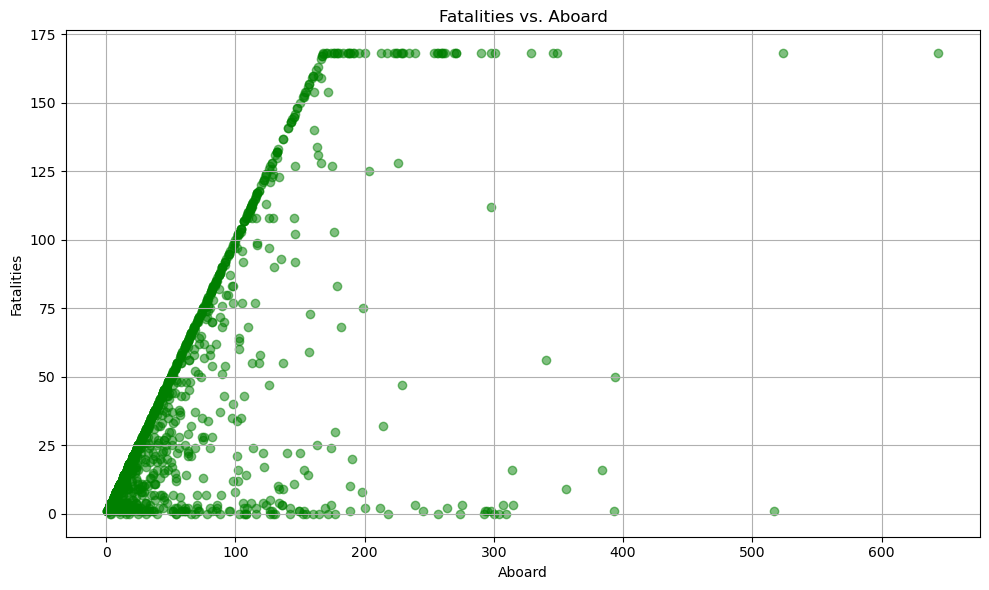

In [147]:
import matplotlib.pyplot as plt

# Create a scatter plot of fatalities vs. aboard
plt.figure(figsize=(10, 6))
plt.scatter(df['Aboard'], df['Fatalities'], color='green', alpha=0.5)

# Add labels and title
plt.xlabel('Aboard')
plt.ylabel('Fatalities')
plt.title('Fatalities vs. Aboard')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()